### ROAD LANE DETECTION

In [1]:
from pylab import rcParams
rcParams['figure.figsize']=(10,10)
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

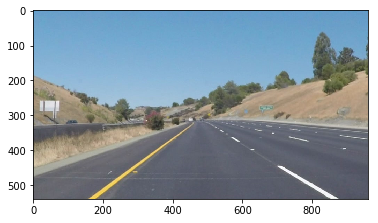

In [2]:
test=cv.imread("solidYellowCurve2.jpg")
test=cv.cvtColor(test,cv.COLOR_BGR2RGB)
plt.imshow(test)

In [3]:
test_g=cv.cvtColor(test,cv.COLOR_BGR2GRAY)

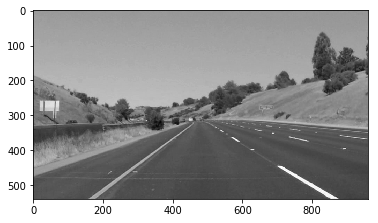

In [4]:
plt.imshow(test_g,cmap='gray')

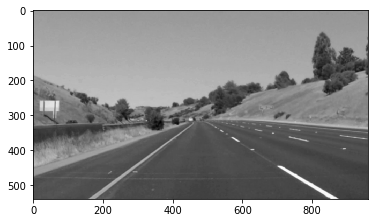

In [5]:
#guassian blur
test_b=cv.GaussianBlur(test_g,(5,5),0)
plt.imshow(test_b,cmap='gray')

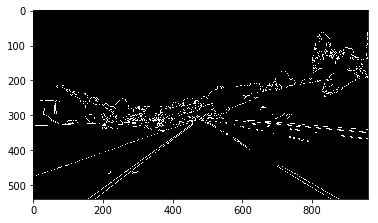

In [6]:
#canny edge detection
test_c=cv.Canny(test_g,30,220)
plt.imshow(test_c,cmap='gray')

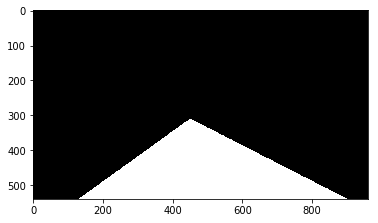

In [7]:
#generate black mask
mask=np.zeros_like(test_c)

p=np.array([(130,540),(450,310),(900,540)])

reg=cv.fillPoly(mask,[p],255)
plt.imshow(reg,cmap='gray')

reg_b=cv.bitwise_and(test_c,reg)
plt.imshow(mask,cmap='gray')

In [8]:
test.shape

(540, 960, 3)

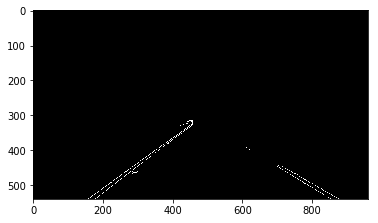

In [9]:
plt.imshow(reg_b,cmap='gray')

In [14]:
lines=cv.HoughLinesP(
    reg_b,
    rho=6,
    theta=np.pi/60,
    threshold=160,
    minLineLength=40,
    lines=np.array([]),
    maxLineGap=5)

In [15]:
lines

array([[[360, 394, 460, 322]],

       [[159, 538, 355, 396]],

       [[282, 460, 330, 422]],

       [[343, 412, 434, 345]],

       [[253, 482, 297, 447]],

       [[805, 499, 862, 532]],

       [[226, 503, 276, 463]],

       [[749, 466, 875, 539]],

       [[190, 531, 255, 479]],

       [[701, 448, 771, 489]]], dtype=int32)

In [16]:
lines[0]

array([[360, 394, 460, 322]], dtype=int32)

In [17]:
len(lines)

10

In [18]:
count,_,_=lines.shape

In [19]:
lines[0][0]

array([360, 394, 460, 322], dtype=int32)

In [20]:
line_img=np.zeros_like(test)

In [21]:
line_img.shape

(540, 960, 3)

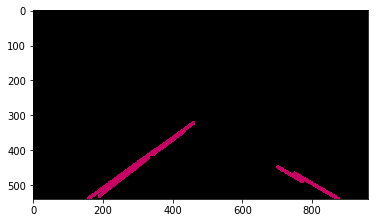

In [25]:
for line in lines:
    x1,y1,x2,y2=line[0]
    cv.line(line_img,(x1,y1),(x2,y2),(200,0,100),10)
plt.imshow(line_img)

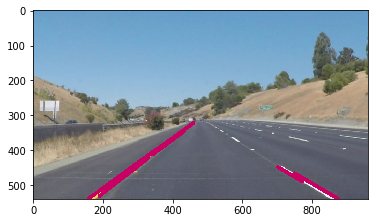

In [28]:
for line in lines:
    x1,y1,x2,y2=line[0]
    cv.line(test,(x1,y1),(x2,y2),(200,0,100),10)
plt.imshow(test,cmap='gray')

In [4]:
from pylab import rcParams
rcParams['figure.figsize']=(10,10)
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
cam=cv.VideoCapture("solidWhiteRight.mp4")
while True:
    try:
        status,frame=cam.read()
        frame_g=cv.cvtColor(frame,cv.COLOR_BGR2GRAY)
        frame_b=cv.GaussianBlur(frame_g,(5,5),0)
        frame_c=cv.Canny(frame_g,30,220)

        mask=np.zeros_like(frame_c)


        p=np.array([(130,540),(450,310),(900,540)])

        reg=cv.fillPoly(mask,[p],255)
        reg_b=cv.bitwise_and(frame_c,reg)

        lines=cv.HoughLinesP(
            reg_b,
            rho=6,
            theta=np.pi/60,
            threshold=160,
            minLineLength=40,
            lines=np.array([]),
            maxLineGap=5)

        count,_,_=lines.shape
        line_img=np.zeros_like(frame)
        for line in lines:
            x1,y1,x2,y2=line[0]
            cv.line(frame,(x1,y1),(x2,y2),(100,0,100),10)

        cv.imshow("qr",frame)
        key = cv.waitKey(1) & 0xff

        if key == ord('q'):
            cv.destroyAllWindows()
            break

        
    except:
        cv.destroyAllWindows()
        break
        
cam.release()

In [12]:
file=open('test.txt','w')
l=[1,2,3,4,5,6,7,8,9,10]
with open('test.txt','a') as f:
        f.write(str(l))

for i in range(1,10):
    l2=[]

    with open('test.txt','a') as f:
            f.write("\n")
    for j in l:
        l2.append(j*2)
    with open('test.txt','a') as f:
        f.write(str(l2))
    l=l2          